In [9]:
import pandas as pd
import numpy as np

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
assert sklearn.__version__ >= "0.20"

data=pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv')
data.head()

,Type of Travel,Online Boarding,In-flight Wifi Service,Ease of Online Booking,Age,In-flight Entertainment,Flight Distance,Departure and Arrival Time Convenience,Seat Comfort,Class,Cleanliness,On-board Service,Leg Room Service,Loyalty
0,0,3.0,3.0,3.0,48,5.0,821,3.0,5.0,0,5.0,3.0,2.0,1
1,0,5.0,2.0,2.0,35,5.0,821,2.0,4.0,0,5.0,5.0,5.0,4
2,0,5.0,4.0,4.0,41,3.0,853,4.0,5.0,0,5.0,3.0,3.0,4
3,0,4.0,2.0,2.0,50,5.0,1905,2.0,5.0,0,4.0,5.0,5.0,4
4,0,5.0,3.0,3.0,49,3.0,3470,3.0,4.0,0,5.0,3.0,4.0,4


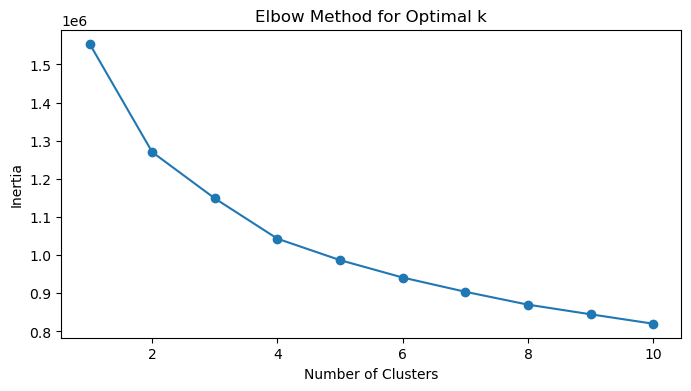

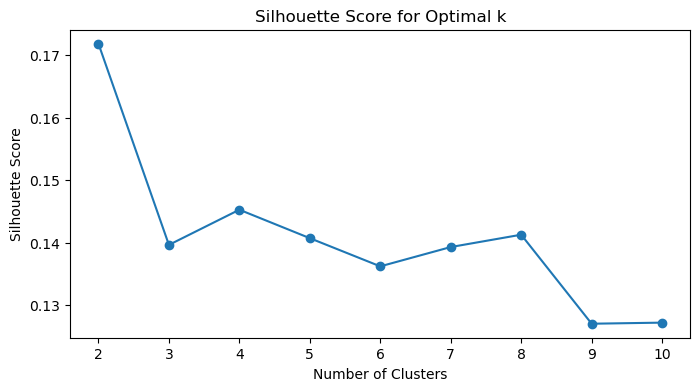

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Remove 'Loyalty' from the dataset
X_original = data.drop(columns=['Loyalty'])

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Step 3: Determine Optimal Number of Clusters
# Using the Elbow Method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Using the Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()



Cluster Profiles:
          Type of Travel  Online Boarding  In-flight Wifi Service  \
Cluster                                                            
0              0.338796         2.502531                2.353925   
1              0.820205         2.929570                2.531116   
2              0.068193         4.176013                4.325017   
3              0.002682         3.943888                2.214109   

         Ease of Online Booking        Age  In-flight Entertainment  \
Cluster                                                               
0                      2.747113  36.702984                 1.914455   
1                      2.458098  38.541470                 3.814273   
2                      4.289041  41.806523                 4.060093   
3                      2.083075  43.230096                 4.141163   

         Flight Distance  Departure and Arrival Time Convenience  \
Cluster                                                            
0        

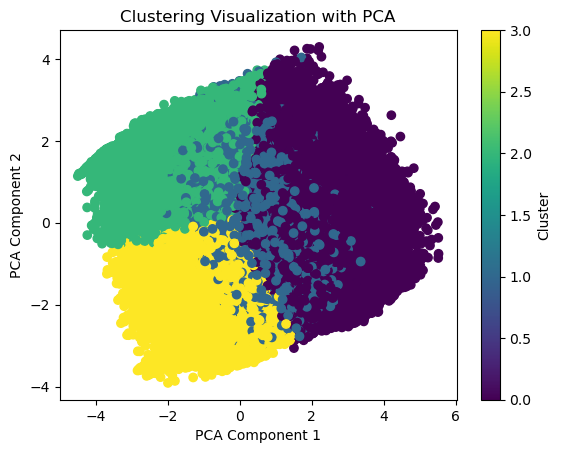

In [23]:
# Step 4: Fit K-Means with the chosen number of clusters
optimal_k = 4  # Replace this with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_original['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Analyze Cluster Profiles
cluster_profiles = X_original.groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

# Step 6: Add Clustering Results to the Original Data
data['Cluster'] = X_original['Cluster']

# Optional: Visualize clustering results using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_original['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()